In [95]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [96]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [97]:
target = np.log(train.SalePrice)

In [98]:
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [99]:
train = train[train['GarageArea'] < 1200]

In [100]:
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)

In [101]:
test['enc_street'] = pd.get_dummies(train.Street, drop_first=True)

In [102]:
def encode(x): return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

In [103]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

In [104]:
sum(data.isnull().sum() != 0)

0

In [105]:
y = np.log(train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)

In [107]:
lr = linear_model.LinearRegression()

In [108]:
model = lr.fit(X_train, y_train)

In [109]:
print ("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.8882477709262591


In [110]:
predictions = model.predict(X_test)

In [111]:
print ('RMSE: ', mean_squared_error(y_test, predictions))

RMSE:  0.01784179451956697


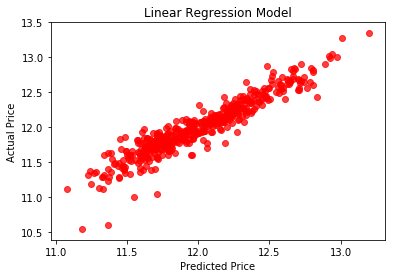

In [112]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,color='r')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

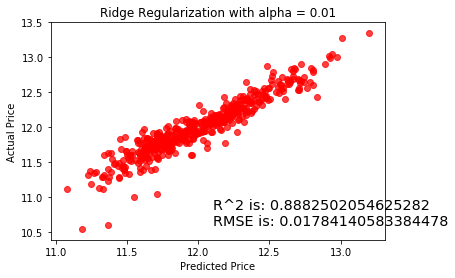

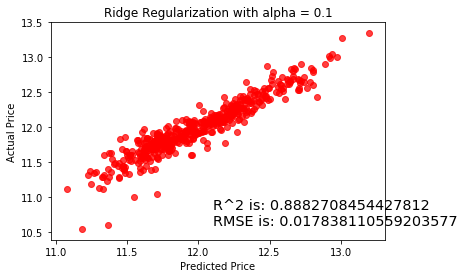

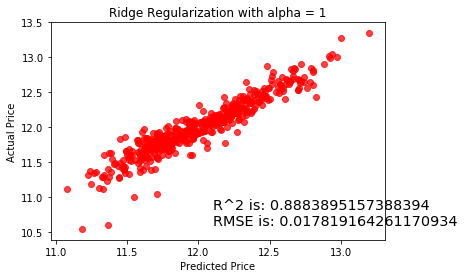

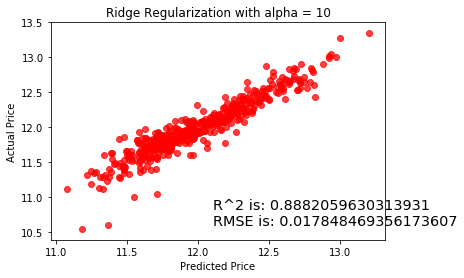

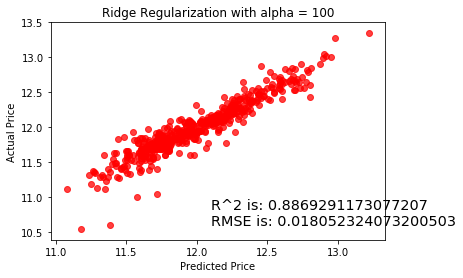

In [113]:
for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)

    plt.scatter(preds_ridge, actual_values, alpha=.75, color='red')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

In [114]:
submission = pd.DataFrame()
submission['Id'] = test.Id

In [115]:
features = test.select_dtypes(include=[np.number]).drop(['Id'], axis=1).interpolate()

In [116]:
predictions = model.predict(features)

In [117]:
final_predictions = np.exp(predictions)

In [118]:
print ("Original predictions: \n", predictions[:5], "\n")
print ("Final predictions: \n", final_predictions[:5])

Original predictions: 
 [11.76725362 11.71929504 12.07656074 12.20632678 12.11217655] 

Final predictions: 
 [128959.49172586 122920.74024361 175704.82598102 200050.83263755
 182075.46986405]


In [119]:
submission['SalePrice'] = final_predictions
submission.head()

,Id,SalePrice
0,1461,128959.491726
1,1462,122920.740244
2,1463,175704.825981
3,1464,200050.832638
4,1465,182075.469864


In [94]:
submission.to_csv('submission1.csv', index=False)